In [1]:
#|default_exp conv

https://www.youtube.com/watch?v=0Hi2r4CaHvk&t=154s

## Convolution

In [2]:
cd /home/admin/projects/learn_miniai/

/home/admin/projects/learn_miniai


In [3]:
#|export
import torch
from torch import nn, tensor
from torch.functional import F

from pathlib import Path
import gzip, pickle

from torch.utils.data import default_collate
from typing import Mapping

from miniai.training import Dataset, get_dls, fit, collate_device, def_device
from miniai.datasets import show_images

### Load mmist data

In [4]:
data_path = Path('/home/admin/projects/learn_miniai/nbs/data')
data_fn = data_path/'mnist.pkl.gz'

with gzip.open(data_fn) as f:
    (x_train, y_train), (x_val, y_val), _ = pickle.load(f, encoding='latin')

x_train, y_train, x_val, y_val = map(tensor, (x_train, y_train, x_val, y_val,))
x_train.shape, y_train.shape

(torch.Size([50000, 784]), torch.Size([50000]))

In [5]:
x_train, x_val = x_train.reshape(-1, 1, 28, 28), x_val.reshape(-1, 1, 28, 28)

In [6]:
train_ds, val_ds = Dataset(x_train, y_train), Dataset(x_val, y_val)

In [7]:
train_dl, val_dl = get_dls(train_ds, val_ds, 9)

In [8]:
xb, yb = next(iter(train_dl))

In [9]:
xb.shape

torch.Size([9, 1, 28, 28])

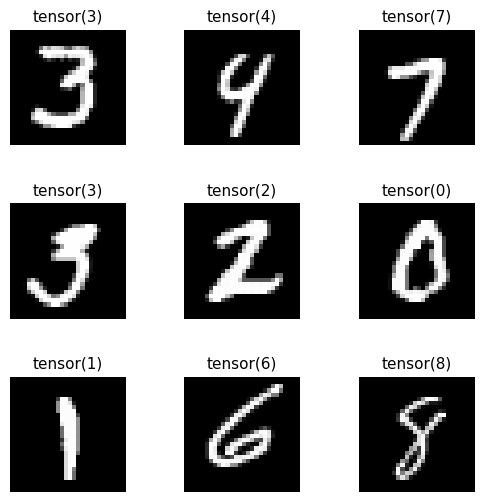

In [10]:
show_images(xb, yb)

## Model

In [11]:
#|export
def conv(ni, nf, ks=3, stride=2, act=True):
    res = nn.Conv2d(ni, nf, stride=stride, kernel_size=ks, padding=ks//2)
    if act == True: res = nn.Sequential(res, nn.ReLU())
    return res

In [12]:
# model
simple_conv = nn.Sequential(
    conv(1, 4), # 14, 14
    conv(4, 8), # 7, 7
    conv(8, 16), # 4, 4
    conv(16, 16), # 2, 2
    conv(16, 10, act=False),
    nn.Flatten()
)
y_pred = simple_conv(xb)

In [13]:
# loss_func
loss_func = F.cross_entropy

In [14]:
# opt
opt = torch.optim.Adam(list(simple_conv.parameters()))

## Fit

In [15]:
train_dl, val_dl = get_dls(train_ds, val_ds, 9)

In [16]:
# %time fit(1, simple_conv, loss_func, opt, train_dl, val_dl)
# user 2min 26s

In [17]:
train_dl, val_dl = get_dls(train_ds, val_ds, 9, collate_device)

In [18]:
%time fit(1, simple_conv.to(def_device), loss_func, opt, train_dl, val_dl)
# 12.2 s

Loss 0.0085. Acc = 0.95
CPU times: user 12.9 s, sys: 468 ms, total: 13.3 s
Wall time: 13.2 s


In [19]:
import nbdev; nbdev.nbdev_export()